In [327]:
import random
import vsketch
import bezmerizing
import sys
from numpy.random import uniform, normal, choice
import numpy as np
import opensimplex
from bezmerizing import Polyline


In [61]:

def uniform_glyph_baseline(n=10):
    pts = [[-0.4, 0.5], [0.4, 0.5]]
    for i in range(n):
        pts.append([uniform(-0.5, 0.5), uniform(-0.5, 0.5)])
    return pts

## use shape method to create a single grid

In [320]:
strokesize = 0.2;
dotcount = 10

# use shape method to create a single grid
def create_grid(x,y,d):
    gridshape = vsk.createShape()
    gridshape.line(x, y+d/2, x+d, y+d/2)
    gridshape.line(x+d/2, y, x+d/2, y+d)
    gridshape.square(x,y,d)
    
#     dotgap = round(r*2/dotcount)
#     for i in range (dotgap):
#         gridshape.point((x-r)+i*5, y)

    return gridshape

In [321]:
# def creat_gridPts(x,y,r):
#     gridPoints =[]  
#     gridPoints.push(point(x-r, y))
#     gridshape.point(x+r, y)
#     gridshape.point(x, y-r)
#     gridshape.point(x, y+r)

## create a list of random points enclosed by a given bounding grid -> as character


In [346]:
# create a list of random points enclosed by grid -> as character

def randomCharPts(gridx, gridy, charPadding, gridsize,count): # grid coord - x,y of the grid origin
    boundcoordx = gridx + gridsize
    boundcoordy = gridy + gridsize
    charpts = []
    for point in range(count):
        newPt = []
#         newPt.append()
        newPt.append(random.uniform(gridx + charPadding, boundcoordx - charPadding))
        newPt.append(random.uniform(gridy + charPadding, boundcoordy - charPadding))
        charpts.append(newPt)
    return charpts

def curvCharPts(pline, count):
    curve_pline = Polyline(pline).augment().catmull_spline().to_polyline(count)
    return curve_pline

## create a char shape with specific amount of strokes (still bounded by grid)
- based on polylines made by char points

In [373]:
def create_charShape(gridx, gridy, charPadding, gridsize, strokecount, curve):
    charShape = vsk.createShape()
    ptscount = random.randrange(2, 5)
    for s in range(strokecount):
        newStroke = randomCharPts(gridx, gridy, charPadding, gridsize, ptscount)
        if curve is True:
            curveStroke = curvCharPts(newStroke, random.randrange(10,20))
            charShape.polygon(curveStroke)
        else:
            charShape.polygon(newStroke)
    return charShape

## add line-thickness variation to the character
- .tangent_offsets() 

In [577]:
def addLineStroke(pts, thickness, samples):
    curveLine = Polyline(pts).augment().catmull_spline()
    for i in range(thickness):
        offset_pline = curveLine.tangent_offsets(distances=[0, i*0.6, 0, i*0.5, 4, i*0.6, 0, i*-0.4], samples_per= samples).vertices
        return offset_pline

In [593]:
def create_charShapeWStroke(gridx, gridy, charPadding, gridsize, strokecount, curve, thickness, samples):
    charShape = vsk.createShape()
    ptscount = random.randrange(2, 5)
    def randOffset(min, max):
        return random.uniform(min, max)
    for s in range(strokecount):
        newStroke = randomCharPts(gridx, gridy, charPadding, gridsize, ptscount)
#         if curve is True:
# #             curveStroke = curvCharPts(newStroke, random.randrange(10,20))
#             charShape.polygon(addLineStroke(newStroke, 10, 36))
#         else:
#             charShape.polygon(newStroke)
        curveLine = Polyline(newStroke).augment().catmull_spline()
        for i in range(5):
            offset_pline = curveLine.tangent_offsets(
                distances=[i*0.01,0,i*-0.02, 0, i*0.02], samples_per=36).vertices
            charShape.polygon(offset_pline)

    return charShape

### test char 


[[3.8925910093576688, 3.0585809898132705]]


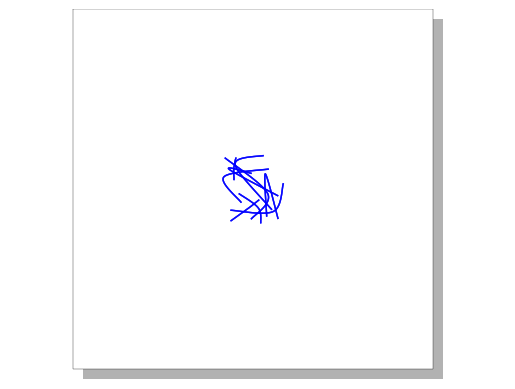

In [594]:
print(randomCharPts(0,0, 0.3, 5,1))

vsk = vsketch.Vsketch()
vsk.size("100mm", "100mm", center=True)
vsk.scale("1mm")
vsk.stroke(1)
charLine = randomCharPts(10, 10, 10, 100, 4)
# vsk.polygon(charLine)
# vsk.stroke(4)
# vsk.polygon(curvCharPts(charLine, 40))

# curveCharLine = Polyline(charLine).augment().catmull_spline()
# for i in range(10):
#     offset_pline = curveCharLine.tangent_offsets(
#         distances=[0, i*0.6, 0, i*0.5, 4, i*0.6, 0, i*-0.4], samples_per=36).vertices
#     vsk.stroke(2)
#     vsk.polygon(offset_pline)
# vsk.stroke(5)
# strokeLine = addLineStroke(charLine,10,36)
# vsk.polygon(strokeLine)

# vsk.shape(create_charShape(10, 10, 10, 100, random.randrange(1, 30), bool(random.getrandbits(1))) )
          
vsk.stroke(5)
    # create_charShapeWStroke(gridx, gridy, charPadding, gridsize, strokecount, curve, thickness, samples)
strokeLine = create_charShapeWStroke(10, 10, 10, 0.2, 9, True, 15, 36 )
# vsk.scale(0.1)

vsk.shape(strokeLine)

vsk.display()

In [595]:
vsk.save("字-13.svg")

## draw the page

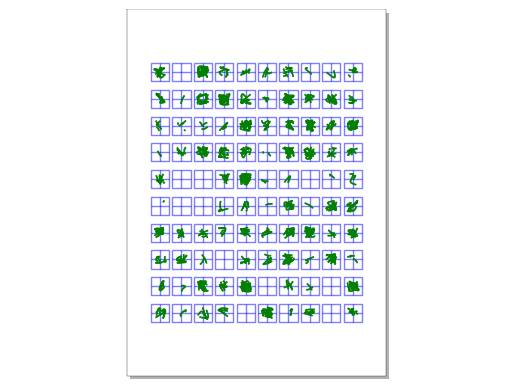

In [605]:
# vsk.size("210mm", "297mm", center=False) -> A4

width = 210
height = 297
grid_count = 10
grid_size = 2
char_padding = grid_size*0.2
padding_top = 5
padding_side = 5

cell_size_x = (width-padding_top*2) / grid_size
cell_size_y = (height-padding_side*2) / grid_size




startingX = width - padding_side
startingY = height - padding_top


# how much to scale the grid: size of cell times a multiplier
# (multiplier controls how much space in the cell the glyph will take up)
scale_val = (width / grid_size) * 0.7

vsk = vsketch.Vsketch()
vsk.size(f"{width}mm", f"{height}mm")

for i in range(grid_count):
    for j in range(grid_count):
#         glyph = uniform_glyph_baseline(random.randrange(4, 12))
        with vsk.pushMatrix():
            vsk.scale("0.1mm")
            vsk.translate(i * cell_size_x, j * cell_size_y)
            vsk.scale(scale_val)
            vsk.stroke(1)
            vsk.shape(create_grid(i, j, grid_size))
#             vsk.scale("1mm")

            # create character for each grid
            vsk.stroke(2)
#             char = create_charShape(i,j, char_padding, grid_size, random.randrange(1, 10), bool(random.getrandbits(1)) )
            # create_charShapeWStroke(gridx, gridy, charPadding, gridsize, strokecount, curve, thickness, samples)
#             vsk.scale((width / grid_size) * 0.2)
            char = create_charShapeWStroke(i,j, char_padding, grid_size, random.randrange(0, 10), True, random.randrange(4, 15), 25 ) # with stroke variation
            vsk.shape(char)
#             vsk.polygon(randomCharPts(i,j, char_padding, grid_size,random.randrange(1,30)))

#         with vsk.pushMatrix():
#             vsk.scale("0.5mm")
#             vsk.translate(i * cell_size_x, j * cell_size_y)
#             vsk.polygon(randomCharPts(i,j,1,5))
#             noiseval2 = opensimplex.noise3(i,j,cell_size_x)
#             noiseval2_scaled = (noiseval2 + 1) * 0.5
#             vsk.stroke(2)
#             vsk.shape(create_grid(i, j, 1*noiseval2_scaled))
vsk.save("田字格-12.svg")
vsk.display()







## no grid textform test

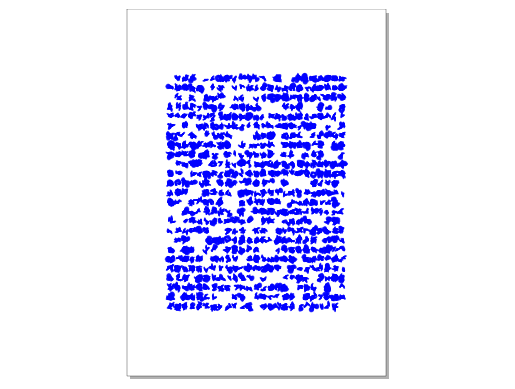

In [535]:
width = 210
height = 297
grid_count = 25
grid_size = 5
char_padding = grid_size * 0.19

padding_top = 5
padding_side = 5

cell_size_x = (width-padding_top*2) / grid_size
cell_size_y = (height-padding_side*2) / grid_size

vsk = vsketch.Vsketch()
vsk.size(f"{width}mm", f"{height}mm")

scale_val = (width / grid_size) * 0.3

for i in range(grid_count):
    for j in range(grid_count):
        with vsk.pushMatrix():
            vsk.scale("0.11mm")
            vsk.translate(i * cell_size_x, j * cell_size_y)
            vsk.scale(scale_val)
            vsk.stroke(1)
            char = create_charShapeWStroke(i,j, char_padding, grid_size, random.randrange(0, 6), True,  random.randrange(5,12), 10 ) # with stroke variation
            vsk.shape(char)
vsk.display()            
vsk.save("字格-5.svg")



In [534]:
# vsk.save("字格-5.svg")